In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import accuracy_score, mean_squared_error, r2_score
from fractions import Fraction
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.svm import SVC, SVR
import seaborn as sns

In [38]:
df = pd.read_csv('/content/drive/MyDrive/Datasets/audible_uncleaned.csv')
df3 = pd.read_csv('/content/drive/MyDrive/Datasets/audible_uncleaned.csv')

In [39]:
# from google.colab import drive
# drive.mount('/content/drive')

# Displaying the data

In [40]:
df

,name,author,narrator,time,releasedate,language,stars,price
0,Geronimo Stilton #11 & #12,Writtenby:GeronimoStilton,Narratedby:BillLobely,2 hrs and 20 mins,04-08-08,English,5 out of 5 stars34 ratings,468.00
1,The Burning Maze,Writtenby:RickRiordan,Narratedby:RobbieDaymond,13 hrs and 8 mins,01-05-18,English,4.5 out of 5 stars41 ratings,820.00
2,The Deep End,Writtenby:JeffKinney,Narratedby:DanRussell,2 hrs and 3 mins,06-11-20,English,4.5 out of 5 stars38 ratings,410.00
3,Daughter of the Deep,Writtenby:RickRiordan,Narratedby:SoneelaNankani,11 hrs and 16 mins,05-10-21,English,4.5 out of 5 stars12 ratings,615.00
4,"The Lightning Thief: Percy Jackson, Book 1",Writtenby:RickRiordan,Narratedby:JesseBernstein,10 hrs,13-01-10,English,4.5 out of 5 stars181 ratings,820.00
...,...,...,...,...,...,...,...,...
87484,Last Days of the Bus Club,Writtenby:ChrisStewart,Narratedby:ChrisStewart,7 hrs and 34 mins,09-03-17,English,Not rated yet,596.00
87485,The Alps,Writtenby:StephenO'Shea,Narratedby:RobertFass,10 hrs and 7 mins,21-02-17,English,Not rated yet,820.00
87486,The Innocents Abroad,Writtenby:MarkTwain,Narratedby:FloGibson,19 hrs and 4 mins,30-12-16,English,Not rated yet,938.00
87487,A Sentimental Journey,Writtenby:LaurenceSterne,Narratedby:AntonLesser,4 hrs and 8 mins,23-02-11,English,Not rated yet,680.00


# Basic information about the above data

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87489 entries, 0 to 87488
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   name         87489 non-null  object
 1   author       87489 non-null  object
 2   narrator     87489 non-null  object
 3   time         87489 non-null  object
 4   releasedate  87489 non-null  object
 5   language     87489 non-null  object
 6   stars        87489 non-null  object
 7   price        87489 non-null  object
dtypes: object(8)
memory usage: 5.3+ MB


# Preprocessing

In [42]:
df.drop_duplicates(inplace = True)

In [43]:
df['narrator'] = df['narrator'].apply(lambda x: x[11:])

In [44]:
df['author'] = df['author'].apply(lambda x: x[10:])

In [45]:
# df[['hour(s)', 'minute(s)']] = df['time'].str.extractall('(\d+)').unstack().astype(int)

In [46]:
import re

def convert_to_minutes(time_duration):
    parts = time_duration.split()
    duration_minutes = 0
    for i in range(0, len(parts), 4):
        if i + 1 < len(parts) and 'hr' in parts[i + 1]:
            duration_minutes += int(parts[i]) * 60
        if i + 4 < len(parts) and 'min' in parts[i + 4]:
            duration_minutes += int(parts[i + 3])
    return duration_minutes

In [47]:
df['time'] = df['time'].apply(convert_to_minutes)

In [48]:
# def spacing(x):
#   words = re.findall(r'[A-Z][a-záéíóúñß]*[-]?[a-zA-Záéíóúñß]*', x)
#   #concatenate the word with space
#   return ' '.join((words))

In [49]:
df['stars1'] = df['stars']

df['stars'] = df['stars1'].apply(lambda x: x.split('stars')[0])

In [50]:
def rating(x):
  try:
    x = x.split('stars')[1]
    return x
  except:
    return x

In [51]:
df['ratings'] = df['stars1'].apply(rating)

In [52]:
def rating2(x):
  if x.endswith('ratings'):
    return x.split('ratings')[0]
  elif x.endswith('rating'):
    return x.split('rating')[0]
  else:
    return None

In [53]:
df['ratings'] = df['ratings'].apply(rating2)

In [54]:
def fix(x):
  try:
    return x.replace(',', '')
  except(AttributeError):
    return x

def fix2(x):
  try:
    return x.replace(' ', '')
  except(AttributeError):
    return x

In [55]:
df['ratings'] = df['ratings'].apply(fix)
df['ratings'] = df['ratings'].apply(fix2)

In [56]:
df['ratings'] = df['ratings'].astype(float)

In [57]:
df['ratings'] = df['ratings'].astype(float)

In [58]:
def ExtractRating(x):
  try:
    return float(re.findall(r'\d+\.\d+',x)[0])
  except(IndexError):
    return None

In [59]:
df['stars'] = df['stars'].apply(ExtractRating)

In [60]:
df['year'] = df['releasedate'].apply(lambda x: x[-2:])
df['month'] = df['releasedate'].apply(lambda x: x[3:5])

In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87489 entries, 0 to 87488
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   name         87489 non-null  object 
 1   author       87489 non-null  object 
 2   narrator     87489 non-null  object 
 3   time         87489 non-null  int64  
 4   releasedate  87489 non-null  object 
 5   language     87489 non-null  object 
 6   stars        4514 non-null   float64
 7   price        87489 non-null  object 
 8   stars1       87489 non-null  object 
 9   ratings      15072 non-null  float64
 10  year         87489 non-null  object 
 11  month        87489 non-null  object 
dtypes: float64(2), int64(1), object(9)
memory usage: 8.0+ MB


In [62]:
print('null values count in each column:\n')
print(df.isnull().sum())

null values count in each column:

name               0
author             0
narrator           0
time               0
releasedate        0
language           0
stars          82975
price              0
stars1             0
ratings        72417
year               0
month              0
dtype: int64


In [63]:
df['stars'].fillna(df['stars'].mean(), inplace = True)

<ipython-input-63-c412d2f3302b>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['stars'].fillna(df['stars'].mean(), inplace = True)


In [64]:
df['ratings'].fillna(0, inplace = True)

<ipython-input-64-942834dfbb36>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['ratings'].fillna(0, inplace = True)


In [65]:
df['price'] = df['price'].apply(lambda x: '0' if x == 'Free' else x.replace(',', ''))

In [66]:
conv=['time', 'year', 'month']

for i in conv:
  df[i]=df[i].astype(int)

df['price']=df['price'].astype(float)

In [67]:
df.drop(['releasedate', 'stars1'], inplace = True, axis = 1)

# Before Preprocessing

In [68]:
df3.head()

,name,author,narrator,time,releasedate,language,stars,price
0,Geronimo Stilton #11 & #12,Writtenby:GeronimoStilton,Narratedby:BillLobely,2 hrs and 20 mins,04-08-08,English,5 out of 5 stars34 ratings,468.00
1,The Burning Maze,Writtenby:RickRiordan,Narratedby:RobbieDaymond,13 hrs and 8 mins,01-05-18,English,4.5 out of 5 stars41 ratings,820.00
2,The Deep End,Writtenby:JeffKinney,Narratedby:DanRussell,2 hrs and 3 mins,06-11-20,English,4.5 out of 5 stars38 ratings,410.00
3,Daughter of the Deep,Writtenby:RickRiordan,Narratedby:SoneelaNankani,11 hrs and 16 mins,05-10-21,English,4.5 out of 5 stars12 ratings,615.00
4,"The Lightning Thief: Percy Jackson, Book 1",Writtenby:RickRiordan,Narratedby:JesseBernstein,10 hrs,13-01-10,English,4.5 out of 5 stars181 ratings,820.00


# After Preprocessing

In [69]:
df.head()

,name,author,narrator,time,language,stars,price,ratings,year,month
0,Geronimo Stilton #11 & #12,GeronimoStilton,BillLobely,140,English,4.382366,468.0,34.0,8,8
1,The Burning Maze,RickRiordan,RobbieDaymond,788,English,4.500000,820.0,41.0,18,5
2,The Deep End,JeffKinney,DanRussell,123,English,4.500000,410.0,38.0,20,11
3,Daughter of the Deep,RickRiordan,SoneelaNankani,676,English,4.500000,615.0,12.0,21,10
4,"The Lightning Thief: Percy Jackson, Book 1",RickRiordan,JesseBernstein,600,English,4.500000,820.0,181.0,10,1


In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87489 entries, 0 to 87488
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      87489 non-null  object 
 1   author    87489 non-null  object 
 2   narrator  87489 non-null  object 
 3   time      87489 non-null  int64  
 4   language  87489 non-null  object 
 5   stars     87489 non-null  float64
 6   price     87489 non-null  float64
 7   ratings   87489 non-null  float64
 8   year      87489 non-null  int64  
 9   month     87489 non-null  int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 6.7+ MB


# Visualization

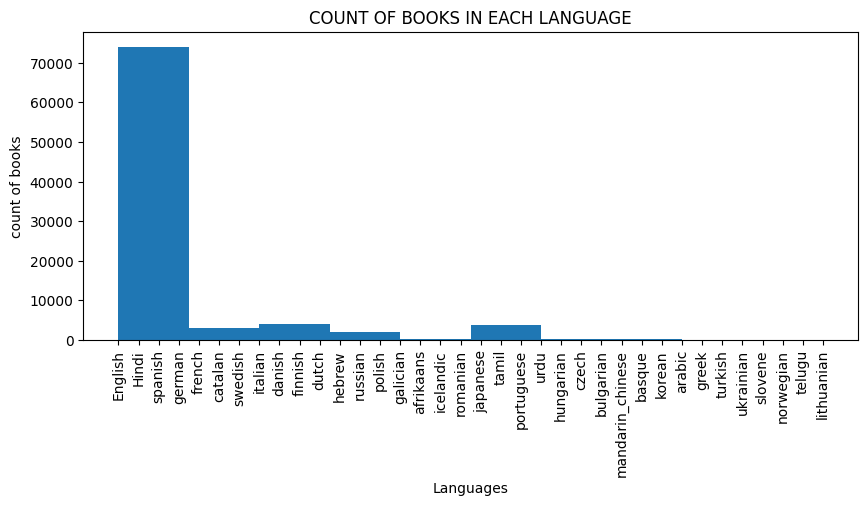

In [71]:
plt.figure(figsize=(10, 4))
plt.xlabel('Languages')
plt.xticks(rotation=90, fontsize=10) #rotation in degrees
plt.ylabel('count of books')
plt.title('COUNT OF BOOKS IN EACH LANGUAGE')
plt.hist(df['language'])
plt.show()

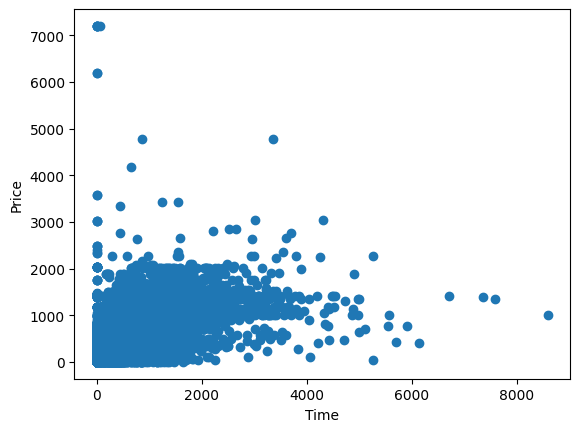

In [72]:
plt.xlabel('Time')
plt.ylabel('Price')
plt.scatter(df['time'], df['price'])
plt.show()

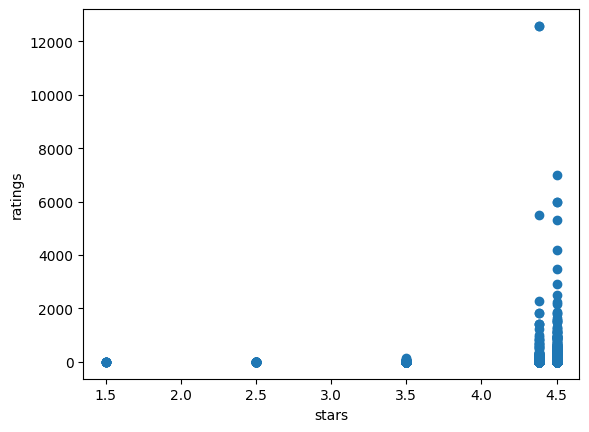

In [73]:
#innacurate since more than 70% is null for both x and y values. this is jus to visualize the filled data using mean of that column

x=df['stars']
y=df['ratings']

plt.xlabel('stars')
plt.ylabel('ratings')
plt.scatter(x, y)
plt.show()

In [74]:
df2 = df

le = LabelEncoder()

l2 = ['name', 'author', 'narrator', 'language']

for i in l2:
  df2[i] = le.fit_transform(df2[i])

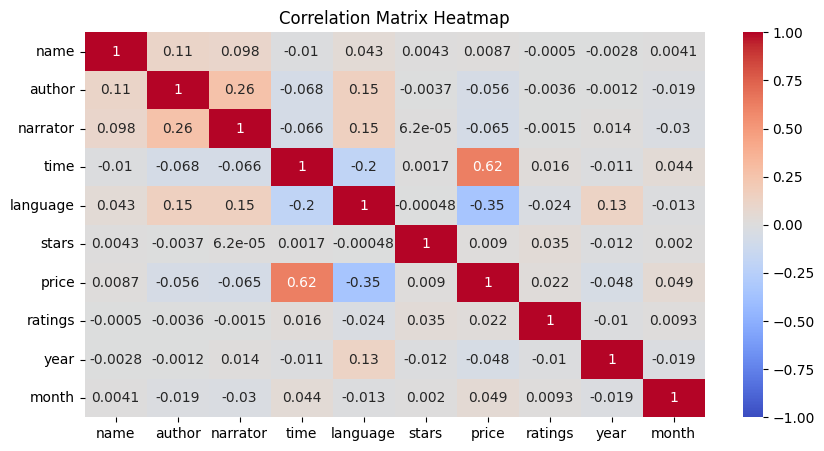

In [75]:
correlation_matrix = df2.corr()

# Plotting the correlation matrix as a heatmap
plt.figure(figsize=(10, 5))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix Heatmap')
plt.show()

In [76]:
df2.head()

,name,author,narrator,time,language,stars,price,ratings,year,month
0,24416,15928,3339,140,0,4.382366,468.0,34.0,8,8
1,58815,37880,23194,788,0,4.500000,820.0,41.0,18,5
2,60078,20289,6118,123,0,4.500000,410.0,38.0,20,11
3,14902,37880,25354,676,0,4.500000,615.0,12.0,21,10
4,63775,37880,12871,600,0,4.500000,820.0,181.0,10,1


In [77]:
# lr = LinearRegression()

In [78]:
# #x = df.drop(['author', 'narrator', 'language', 'price', 'ratings', 'year', 'month'], axis = 1)
# x = df2[['time']]
# y = df2['price']

In [79]:
# x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

In [80]:
# lr.fit(x_train, y_train)

In [81]:
# y_pred = lr.predict(x_test)

In [82]:
# mean_squared_error(y_test, y_pred)

In [83]:
# np.sqrt(mean_squared_error(y_test, y_pred))

In [84]:
# r2_score(y_test, y_pred)

In [85]:
# rndm = RandomForestRegressor()

In [86]:
# x = df2.drop(['price', 'name', 'stars', 'author', 'ratings', 'month'], axis = 1)
# y = df2['price']

In [87]:
# x.head()

In [88]:
# x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

In [89]:
# rndm.fit(x_train, y_train)

In [90]:
# y_pred = rndm.predict(x_test)

In [91]:
# mean_squared_error(y_test, y_pred)

In [92]:
# np.sqrt(mean_squared_error(y_test, y_pred))

In [93]:
# r2_score(y_test, y_pred)

In [94]:
# correlation_matrix = df2.drop(['name', 'stars', 'author', 'ratings', 'month'], axis = 1).corr()

# # Plotting the correlation matrix as a heatmap
# plt.figure(figsize=(15, 6))
# sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
# plt.title('Correlation Matrix Heatmap')
# plt.show()